In [84]:
#importation des bibliothèques 

#Le module "rcParams" est utilisé pour configurer les paramètres de rendu dans Matplotlib, tels que les tailles de police, les couleurs par défaut, etc.
#%matplotlib inline :  spécifique à Jupyter Notebook . Cette directive indique à Jupyter d'afficher les graphiques générés par Matplotlib directement dans le notebook, plutôt que dans une fenêtre séparée. 
#NumPy : Une bibliothèque Python essentielle pour les calculs scientifiques
#Pandas : Une bibliothèque Python puissante pour la manipulation et l'analyse de données, offrant des structures de données flexibles (Series et DataFrame) pour importer, nettoyer, transformer et analyser des jeux de données de manière efficace.
#Seaborn : Une bibliothèque de visualisation de données basée sur Matplotlib
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

### load DATA

In [4]:
#importation et affichage de jeu de données 
df = pd.read_excel(r'C:\Users\SESA705295\Downloads\EQDB4PowerBI.xlsm')
df

,Internal ID,Portfolio Folder,Portfolio Folder L1,Portfolio Folder L2,Portfolio Folder L3,Portfolio Folder L4,Portfolio Folder L5,ID,Name,manager1,...,horiz2,sinit2,pline2,Quality Score (0-1),BC OK,HORIZ OK,PL OK,budget range,pgcount,SG OK
0,194176,Energy Management.China for China.Transverse,Energy Management,China for China,Transverse,,,[FINR] C4C Other structure costs,[FINR]_C4C Other structure costs,"WANG, Jing",...,,,,1.000000,1,1,1,>= 5M,0.0,1
1,204290,Energy Management.Home & Distribution.Hub Euro...,Energy Management,Home & Distribution,Hub Europe,League Resi,Unica EU-UK,[HEIDI 02,NIEBLA (heidi deployment EMEA),"AGUDO, Alberto",...,,,,0.913043,1,1,1,>= 5M,0.0,1
2,194440,Energy Management.Home & Distribution.Hub Chin...,Energy Management,Home & Distribution,Hub China,China CL,,[MBC]CL_ASIA,[MBC]CL_ASIA,"WEI, Min",...,,,,0.942029,1,1,1,0-500k,0.0,1
3,194599,Energy Management.Power Products.PP Strategy,Energy Management,Power Products,PP Strategy,,,[RDNP] Architects Team,[RDNP] Architects Team,"BELLANGER, Carole",...,,,,1.000000,1,1,1,>= 5M,0.0,1
4,194691,Energy Management.Power Products.PP CS&Q,Energy Management,Power Products,PP CS&Q,,,[RDNP] Quality Team & Residual,[RDNP] Quality Team & Residual,"LESAINT, Celine",...,,,,1.000000,1,1,1,500k-4.99M,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,202230,Energy Management.Home & Distribution.GOI.GOI_...,Energy Management,Home & Distribution,GOI,GOI_LEAGUE OFFER INNOVATION,,WD Global OTM 140909,KAINO (innovation WD global),"MARTY, Eric",...,,,,0.942029,1,1,1,500k-4.99M,0.0,1
4145,211759,Energy Management.Home & Distribution.Supply C...,Energy Management,Home & Distribution,Supply Chain,Trade Business,,WD Global OTM 14090A,zz_DOMANI,"BOSCHER, Veronique",...,,,,0.942029,1,1,1,0-500k,0.0,1
4146,204771,Energy Management.Home & Distribution.Hub Euro...,Energy Management,Home & Distribution,Hub Europe,League Resi,Medium,WD PMP CE60 2015002,ZEBRA (Anti Valena),"FISCHER, Jochen",...,,,,0.942029,1,1,1,>= 5M,0.0,1
4147,139439,Energy Management.Digital Energy.Digital Build...,Energy Management,Digital Energy,Digital Buildings,Core BMS,Controllers,WiFIcard8000V4PMP,zz_SB.PMP.Wifi & Ethernet modules for Room Con...,"JOLY, Julien",...,,,,0.826087,1,1,1,>= 5M,0.1,1


In [4]:
#Exporte le DataFrame 'df' vers un fichier CSV nommé 'EQDB4PowerBI.csv', en excluant l'index.
df.to_csv('EQDB4PowerBI.csv', index=False)

#### Data Preparation

In [5]:
# Replace commas with periods in the concerned columns 
df[['irr', 'Yield Index', 'IRR @ SELL', 'Gross Margin @ Mature Year']] = \
    df[['irr', 'Yield Index', 'IRR @ SELL', 'Gross Margin @ Mature Year']].replace(',', '.', regex=True)

In [85]:
df2=df.copy()
df2.shape

(4149, 160)

In [86]:
# Find the indices of the lines to delete
indices_a_supprimer = df2[df2['Type'].isin(['FINR', 'RDNP_SFC', 'FITC', 'RDNP_MBC','TRSK'])].index
# Delete rows with found clues
df2 = df2.drop(indices_a_supprimer)
df2.shape

(3850, 160)

In [87]:
# Remove lines where 'Cost Bucket' equals 'Yes'
df2 = df2[df2['Cost bucket'] != 'Yes']
df2.shape

(2782, 160)

In [88]:
df2.nature.unique()

array(['Project', 'Offer', 'Epic', 'Platform'], dtype=object)

In [89]:
# Use the Pandas "apply" function to apply a function to each element in the "nature" column
def transform_nature(nature):
    if nature == 'Project':
        return 'Project'
    else:
        return 'Agile'

df2['nature'] = df2['nature'].apply(transform_nature)

# Afficher le résultat
df2.head()

,Internal ID,Portfolio Folder,Portfolio Folder L1,Portfolio Folder L2,Portfolio Folder L3,Portfolio Folder L4,Portfolio Folder L5,ID,Name,manager1,...,horiz2,sinit2,pline2,Quality Score (0-1),BC OK,HORIZ OK,PL OK,budget range,pgcount,SG OK
1,204290,Energy Management.Home & Distribution.Hub Euro...,Energy Management,Home & Distribution,Hub Europe,League Resi,Unica EU-UK,[HEIDI 02,NIEBLA (heidi deployment EMEA),"AGUDO, Alberto",...,,,,0.913043,1,1,1,>= 5M,0.00,1
15,210577,Industrial Automation.IC&D.SENSORS,Industrial Automation,IC&D,SENSORS,,,1101386,ZZZ(Completed) IIOT step 1 (former C2C),"PALACIN, David",...,,,,1.000000,1,1,1,500k-4.99M,0.00,1
16,205954,Industrial Automation.IC&D.SENSORS,Industrial Automation,IC&D,SENSORS,,,1101422,Program Apollo - Holder,"LABICHE, Hugues",...,,,,1.000000,1,1,1,>= 5M,0.25,1
17,207800,Industrial Automation.IC&D.SENSORS,Industrial Automation,IC&D,SENSORS,,,1101596,Seven (ex Cyan),"PALACIN, David",...,,,,1.000000,1,1,1,500k-4.99M,0.00,1
18,202433,Industrial Automation.IC&D.Drives.DriveProducts,Industrial Automation,IC&D,Drives,DriveProducts,,1152557,Low Harmonic Drive Regen,"BUREAU, Franck",...,,,,1.000000,1,1,1,0-500k,0.00,1


In [90]:
# Select the specific columns we want to keep
df2 = df2.loc[:, ['ID','Portfolio Folder L1','Portfolio Folder L2','Budget Prior', 'Type', 'nature','irr','Framework', 'status','OPEN','CLOSE','SELL','ENGAGE','DO','SELECT','IMPLEMENT','PRODUCE','Program Holder','Program ID', 'Horizon', 'Business Case Id','Budget Total','Budget Total+CAPEX','Target Y+1','Total Costs + CAPEX','Costs Total']]

# Remove all other columns
df2 = df2.drop(columns=[col for col in df2.columns if col not in ['ID','Portfolio Folder L1','Portfolio Folder L2','Budget Prior','Type', 'nature','irr', 'Framework','Program ID', 'status','OPEN','CLOSE','SELL','ENGAGE','DO','SELECT','IMPLEMENT','PRODUCE','Program Holder', 'Horizon','Business Case Id','Budget Total','Budget Total+CAPEX','Target Y+1','Total Costs + CAPEX','Costs Total']])

# Afficher le résultat
df2.head()

,ID,Portfolio Folder L1,Portfolio Folder L2,Budget Prior,Type,nature,irr,Framework,status,OPEN,...,PRODUCE,Program Holder,Program ID,Horizon,Business Case Id,Budget Total,Budget Total+CAPEX,Target Y+1,Total Costs + CAPEX,Costs Total
1,[HEIDI 02,Energy Management,Home & Distribution,2697113,NEW,Project,0.5,Waterfall,Completed,2019-04-01,...,2021-05-28 00:00:00,no,,H1 - Core,1269,2999733,6539733,0,6389852.0,2849852
15,1101386,Industrial Automation,IC&D,1018999,NEW,Project,,Waterfall,Completed,2016-09-15,...,,no,,H1 - Core,,1018755,1031755,0,791883.0,778883
16,1101422,Industrial Automation,IC&D,666579,NEW,Project,0,Waterfall,Opened,2018-06-04,...,2020-06-08 00:00:00,yes,Program Apollo,H1 - Core,916,678853,678853,0,867372.0,867372
17,1101596,Industrial Automation,IC&D,1210326,NEW,Project,0.1,Waterfall,Opened,2018-03-01,...,2022-01-15 00:00:00,no,,H1 - Core,2459,1813945,2197945,0,2165149.0,1781149
18,1152557,Industrial Automation,IC&D,0,NEW,Project,,,Under Simulation,2023-03-06,...,,no,,H1 - Core,,0,0,0,0.0,0


In [91]:
df2.shape

(2782, 26)

In [92]:
#Transform the specified columns in the list by removing white spaces and converting the values ​​to datetime objects in the format "YYYY-MM-DD".
columns_to_transform = ['OPEN','CLOSE','SELL','ENGAGE','DO','SELECT','IMPLEMENT','PRODUCE']

for col in columns_to_transform:
    df2[col] = df2[col].str.strip()
    df2[col] = pd.to_datetime(df2[col], format="%Y-%m-%d")


In [93]:
date_columns = ['OPEN','CLOSE','SELL','ENGAGE','DO','SELECT','IMPLEMENT','PRODUCE']
# calculate the duration for each row and store the results in a new column "Project Duration"
df2['Project Duration'] = df2[date_columns].max(axis=1) - df2[date_columns].min(axis=1)
df2['Project Duration'] = df2['Project Duration'].dt.days
# Delete date columns
df2 = df2.drop(columns=date_columns)

In [94]:
df2.shape

(2782, 19)

In [97]:
# Select the specific columns we want to keep
indices_a_supprimer = df2[df2['status'].isin(['Frozen','Opened','Under Simulation', 'Planned'])].index
# Remove all other columns
df2 = df2.drop(indices_a_supprimer)
df2.shape

(862, 19)

In [98]:
# Count the number of missing or zero values ​​in "Project Duration" for each "status" value
counts = df2.groupby('status')['Project Duration'].apply(lambda x: (x.isnull() | (x == 0)).sum())

print("number of missing or zero values ​​in 'Project Duration' for each 'status' value:")
print(counts)

Nombre de valeurs manquantes ou égales à zéro dans 'Project Duration' pour chaque valeur de 'status':
status
Cancelled    10
Completed     0
Name: Project Duration, dtype: int64


In [58]:
# Count the number of missing values ​​in "Project Duration" for each "status" value
missing_counts = df2.groupby('status')['Project Duration'].apply(lambda x: x.isnull().sum())

# Count the number of zeros in "Project Duration" for each "status" value
zero_counts = df2.groupby('status')['Project Duration'].apply(lambda x: (x == 0).sum())

print("number of missing or zero values ​​in 'Project Duration' for each 'status' value:")
print(missing_counts)
print("\nNumber of zeros in 'Project Duration' for each 'status' value:")
print(zero_counts)

Nombre de valeurs manquantes dans 'Project Duration' pour chaque valeur de 'status':
status
Cancelled    9
Completed    0
Name: Project Duration, dtype: int64

Nombre de zéros dans 'Project Duration' pour chaque valeur de 'status':
status
Cancelled    1
Completed    0
Name: Project Duration, dtype: int64


In [99]:
# Define a function that takes a value from the Horizon column and returns the corresponding value
def get_horizon_value(Horizon):
    if Horizon == 'H1 - Core':
        return 0
    elif Horizon == 'H3 - Disruptive':
        return 1
    else:
        return 0.5

# Apply the function to each item in the Horizon column to create a new "Horizon Value" column
df2['Horizon'] = df2['Horizon'].apply(get_horizon_value)
df2.head()

,ID,Portfolio Folder L1,Portfolio Folder L2,Budget Prior,Type,nature,irr,Framework,status,Program Holder,Program ID,Horizon,Business Case Id,Budget Total,Budget Total+CAPEX,Target Y+1,Total Costs + CAPEX,Costs Total,Project Duration
1,[HEIDI 02,Energy Management,Home & Distribution,2697113,NEW,Project,0.5,Waterfall,Completed,no,,0.0,1269,2999733,6539733,0,6389852.0,2849852,1429.0
15,1101386,Industrial Automation,IC&D,1018999,NEW,Project,,Waterfall,Completed,no,,0.0,,1018755,1031755,0,791883.0,778883,909.0
33,12KLO61E,Energy Management,Digital Energy,3033642,NEW,Project,,Waterfall,Completed,no,KJOX1HZ4,0.5,,3789471,4332471,0,3637603.0,3094603,1143.0
55,1604115,Industrial Automation,Digital Factory,0,NEW,Project,,Waterfall,Cancelled,yes,,0.0,,0,0,0,0.0,0,1998.0
56,1604120,Industrial Automation,Digital Factory,2725614,NEW,Project,0.3,Waterfall,Completed,no,,0.0,320,2727997,3884997,0,3901736.0,2744736,993.0


In [100]:
# Définissez une fonction qui prend une valeur de la colonne Horizon et retourne la valeur correspondante
def get_horizon_value(Framework):
    if Framework == 'Waterfall':
        return 0
    elif Framework == 'Agile':
        return 1
    else:
        return 0.5

# Appliquez la fonction à chaque élément de la colonne Horizon pour créer une nouvelle colonne "Horizon Value"
df2['Framework'] = df2['Framework'].apply(get_horizon_value)

In [101]:
# creation of the “Project Size” column
df2['Project Size'] = df2[['Budget Total','Budget Prior','Budget Total+CAPEX','Total Costs + CAPEX', 'Costs Total']].max(axis=1)

# affichage du résultat
df2.describe()

,Budget Prior,Framework,Horizon,Budget Total,Budget Total+CAPEX,Target Y+1,Total Costs + CAPEX,Costs Total,Project Duration,Project Size
count,8.620000e+02,862.000000,862.000000,8.620000e+02,8.620000e+02,862.0,8.620000e+02,8.620000e+02,853.000000,8.620000e+02
mean,7.243067e+05,0.322506,0.233179,7.969012e+05,8.374209e+05,0.0,7.027765e+05,6.622568e+05,801.357562,9.029257e+05
std,2.018223e+06,0.362023,0.307912,2.053525e+06,2.174311e+06,0.0,1.481579e+06,1.361956e+06,676.194148,2.101277e+06
min,-1.652447e+07,0.000000,0.000000,-1.652447e+07,-1.652447e+07,0.0,-1.800509e+06,-1.800509e+06,0.000000,-1.800509e+06
25%,1.244250e+03,0.000000,0.000000,3.359675e+04,3.515875e+04,0.0,1.384175e+04,8.851000e+03,362.000000,4.145025e+04
50%,1.671050e+05,0.000000,0.000000,2.354100e+05,2.378190e+05,0.0,1.729825e+05,1.683240e+05,624.000000,2.514795e+05
75%,5.965058e+05,0.500000,0.500000,7.398780e+05,7.442292e+05,0.0,6.919600e+05,6.723922e+05,1040.000000,8.172072e+05
max,3.411748e+07,1.000000,1.000000,3.411748e+07,3.414291e+07,0.0,1.573006e+07,1.413006e+07,4382.000000,3.414291e+07


In [102]:
df2.loc[df2["status"]=="Cancelled"].sort_values("Project Size")

,ID,Portfolio Folder L1,Portfolio Folder L2,Budget Prior,Type,nature,irr,Framework,status,Program Holder,Program ID,Horizon,Business Case Id,Budget Total,Budget Total+CAPEX,Target Y+1,Total Costs + CAPEX,Costs Total,Project Duration,Project Size
55,1604115,Industrial Automation,Digital Factory,0,NEW,Project,,0.0,Cancelled,yes,,0.0,,0,0,0,0.0,0,1998.0,0.0
1466,KTCSEGT5,Industrial Automation,Digital Factory,0,NEW,Project,,0.5,Cancelled,no,KTLAK0DK,1.0,,0,0,0,0.0,0,1070.0,0.0
3887,projcancel,Industrial Automation,Digital Factory,0,NEW,Project,,0.5,Cancelled,no,,0.0,,0,0,0,0.0,0,275.0,0.0
1423,KSPE7ODP,Industrial Automation,Digital Factory,0,NEW,Project,,0.5,Cancelled,no,,0.0,,0,0,0,0.0,0,336.0,0.0
1422,KSOK4S6P,Industrial Automation,Digital Factory,0,ADAP,Project,,1.0,Cancelled,no,,0.5,,0,0,0,0.0,0,210.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,1A38OUU,Industrial Automation,PA,1482457,NEW,Project,,0.0,Cancelled,no,,0.5,,1482457,1482457,0,416318.0,416318,2515.0,1482457.0
729,1G51ARQ,Energy Management,Home & Distribution,837000,NEW,Project,0.6,0.0,Cancelled,no,,0.5,274,845769,1145769,0,1512862.0,1212862,1400.0,1512862.0
470,1EPTQOS,Energy Management,Home & Distribution,1000305,NEW,Project,,0.0,Cancelled,no,,0.0,,1532795,1532795,0,1536148.0,1536148,511.0,1536148.0
1918,KZFEKK7G,Industrial Automation,Digital Factory,0,NEW,Project,,0.5,Cancelled,no,,0.5,,109701,109701,0,2140530.0,2140530,625.0,2140530.0


<AxesSubplot:>

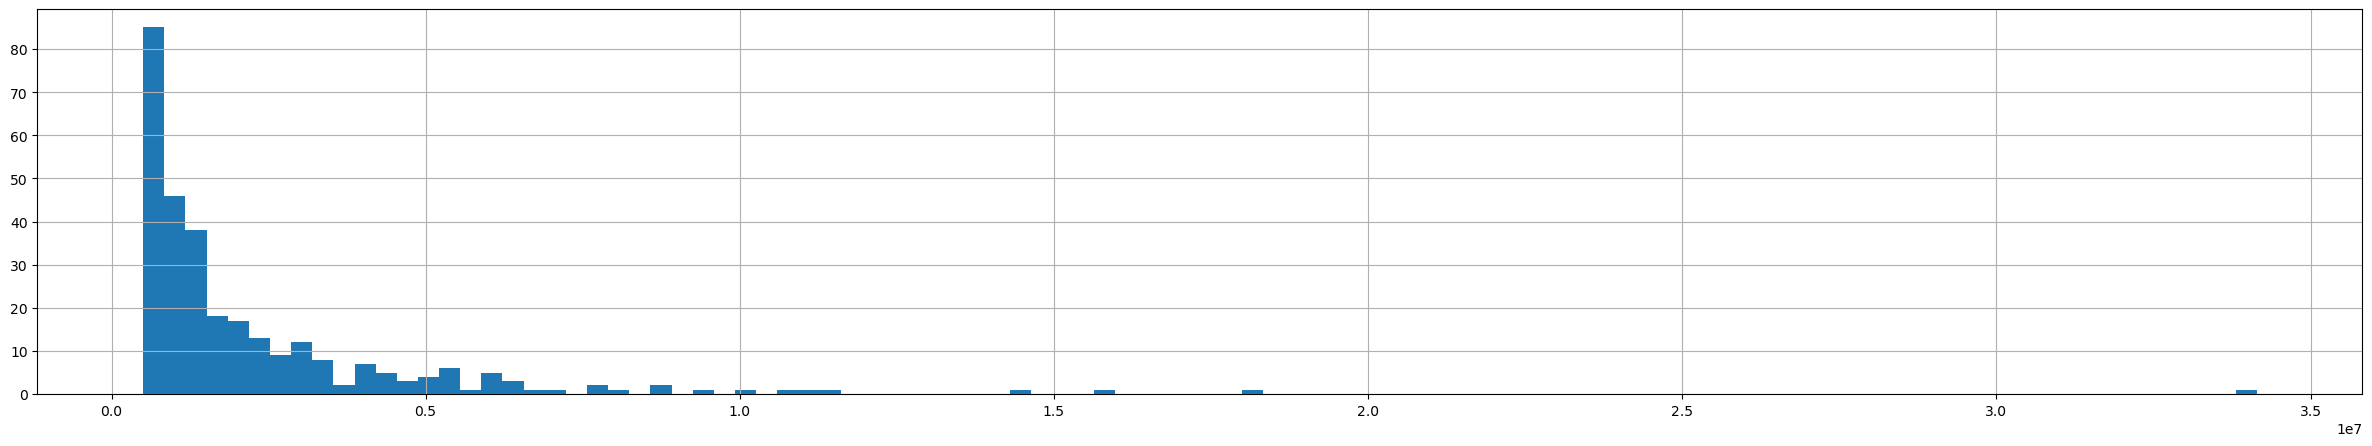

In [85]:
df2.loc[df2["Project Size"]>500000]["Project Size"].hist(bins=100, figsize=(30, 5))

In [103]:
df2.columns

Index(['ID', 'Portfolio Folder L1', 'Portfolio Folder L2', 'Budget Prior',
       'Type', 'nature', 'irr', 'Framework', 'status', 'Program Holder',
       'Program ID', 'Horizon', 'Business Case Id', 'Budget Total',
       'Budget Total+CAPEX', 'Target Y+1', 'Total Costs + CAPEX',
       'Costs Total', 'Project Duration', 'Project Size'],
      dtype='object')

In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 1 to 4147
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   862 non-null    object 
 1   Portfolio Folder L1  862 non-null    object 
 2   Portfolio Folder L2  862 non-null    object 
 3   Budget Prior         862 non-null    int64  
 4   Type                 862 non-null    object 
 5   nature               862 non-null    object 
 6   irr                  862 non-null    object 
 7   Framework            862 non-null    float64
 8   status               862 non-null    object 
 9   Program Holder       862 non-null    object 
 10  Program ID           862 non-null    object 
 11  Horizon              862 non-null    float64
 12  Business Case Id     862 non-null    object 
 13  Budget Total         862 non-null    int64  
 14  Budget Total+CAPEX   862 non-null    int64  
 15  Target Y+1           862 non-null    in

In [105]:
# Transformation de la colonne 'Program ID'
#Converts the values ​​in the 'Program ID' /Business Case Id' column to 1 if they are not empty, otherwise converts them to 0.
df2['Program ID'] = df2['Program ID'].apply(lambda x: 1 if x.strip() != '' else 0)
df2['Business Case Id'] = df2['Business Case Id'].apply(lambda x: 1 if x.strip() != '' else 0)

In [106]:
cols_to_use = ['ID','Portfolio Folder L2','Portfolio Folder L1', 'Type', 'nature', 'Framework', 'status', 'irr','Program Holder', 'Program ID', 'Horizon', 'Business Case Id', 'Project Size','Project Duration']
df3 = df2[cols_to_use].copy()
df3.shape

(862, 14)

In [107]:
df3['Project Size'].value_counts()

0.0          112
8000.0         3
15000.0        2
6000.0         2
6539733.0      1
            ... 
219341.0       1
265831.0       1
294480.0       1
134635.0       1
1296680.0      1
Name: Project Size, Length: 747, dtype: int64

In [108]:
df3.shape

(862, 14)

In [109]:
# Load and add canceled projects from CSV file extrated from df_snap (datatset rolling 12 month)
cancelled_rows = pd.read_csv(r'C:\Users\SESA705295\Desktop\python\cancelled_rows.csv')

In [110]:
# Concatenate rows from canceled_rows to DF2
df5 = pd.concat([df3, cancelled_rows]).drop_duplicates(subset='ID')

# Check count of 'Project Size' values ​​after adding
print(df5['Project Size'].value_counts(dropna=False))

0.0          184
100000.0       4
8000.0         3
20000.0        3
150000.0       2
            ... 
194296.0       1
186496.0       1
874082.0       1
1487144.0      1
352844.0       1
Name: Project Size, Length: 792, dtype: int64


In [112]:
# Define the transformation function
def strip_spaces(value):
    return value.strip()

# Apply the function to the "Program Holder" column
df5['Program Holder'] = df5['Program Holder'].apply(strip_spaces)

In [122]:
df5.shape

(938, 13)

In [121]:
# Select projects with a value of 0 in "Project Size" and a status "Completed"
df_filtered = df5.loc[(df5['Project Size'] == 0) & (df5['status'] == 'Completed')]

# Delete selected projects
df5 = df5.drop(df_filtered.index)

# Afficher le DataFrame mis à jour
df5.shape


(938, 13)

In [123]:
# purpose : Project Size defines the project budget. We aimed to select the most relevant information from EOLE85. We discovered numerous 0 values in this column, so we transformed them into NaN values. 
# Additionally, we excluded some completed projects for which budget information was unavailable.
# Liste des colonnes à remplacer
colonnes_a_remplacer = ['Project Size']

# Replace all 0 values ​​in column ['Project Size'] to be replaced with NaN
for colonne in colonnes_a_remplacer:
    df5[colonne] = df5[colonne].replace(0, np.nan)

In [124]:
mapping2 = {'Energy Management': 0, 'Industrial Automation':1}
mapping4 = {'Project': 0, 'Agile': 1}
mapping5 = {'Completed': 1, 'Cancelled': 0}
mapping7 = { 'yes':1 ,'no':0 }

colonnes_mapping = {'Portfolio Folder L1': mapping2, 'nature': mapping4, 'status': mapping5 ,'Program Holder' :mapping7}

for colonne, mapping in colonnes_mapping.items():
    df5[colonne] = df5[colonne].replace(mapping)

df5.head()

,ID,Portfolio Folder L2,Portfolio Folder L1,Type,nature,Framework,status,Program Holder,Program ID,Horizon,Business Case Id,Project Size,Project Duration
1,[HEIDI 02,Home & Distribution,0,NEW,0,0.0,1,0,0,0.0,1,6539733.0,1429.0
15,1101386,IC&D,1,NEW,0,0.0,1,0,0,0.0,0,1031755.0,909.0
33,12KLO61E,Digital Energy,0,NEW,0,0.0,1,0,1,0.5,0,4332471.0,1143.0
55,1604115,Digital Factory,1,NEW,0,0.0,0,1,0,0.0,0,NaN,1998.0
56,1604120,Digital Factory,1,NEW,0,0.0,1,0,0,0.0,1,3901736.0,993.0


In [126]:
df5.columns

Index(['ID', 'Portfolio Folder L2', 'Portfolio Folder L1', 'Type', 'nature',
       'Framework', 'status', 'Program Holder', 'Program ID', 'Horizon',
       'Business Case Id', 'Project Size', 'Project Duration'],
      dtype='object')

In [118]:
df5 = df5.drop('irr',axis=1)

In [128]:
df5['Project Size'].value_counts(dropna=False)

NaN          134
100000.0       4
8000.0         3
20000.0        3
150000.0       2
            ... 
194296.0       1
186496.0       1
874082.0       1
1487144.0      1
352844.0       1
Name: Project Size, Length: 792, dtype: int64

In [131]:
# Copy "Project Duration" column from df2 using ID as key
df5['Project Duration'] = df5['ID'].map(df2.set_index('ID')['Project Duration'])

# Afficher le DataFrame résultant
df5.head()

,ID,Portfolio Folder L2,Portfolio Folder L1,Type,nature,Framework,status,Program Holder,Program ID,Horizon,Business Case Id,Project Size,Project Duration
1,[HEIDI 02,Home & Distribution,0,NEW,0,0.0,1,0,0,0.0,1,6.539733e+06,1429.0
15,1101386,IC&D,1,NEW,0,0.0,1,0,0,0.0,0,1.031755e+06,909.0
33,12KLO61E,Digital Energy,0,NEW,0,0.0,1,0,1,0.5,0,4.332471e+06,1143.0
55,1604115,Digital Factory,1,NEW,0,0.0,0,1,0,0.0,0,9.456284e+05,1998.0
56,1604120,Digital Factory,1,NEW,0,0.0,1,0,0,0.0,1,3.901736e+06,993.0


In [41]:
df5.columns

Index(['ID', 'Portfolio Folder L2', 'Portfolio Folder L1', 'Type', 'nature',
       'Framework', 'status', 'Program Holder', 'Program ID', 'Horizon',
       'Business Case Id', 'Project Size', 'Project Duration'],
      dtype='object')

0


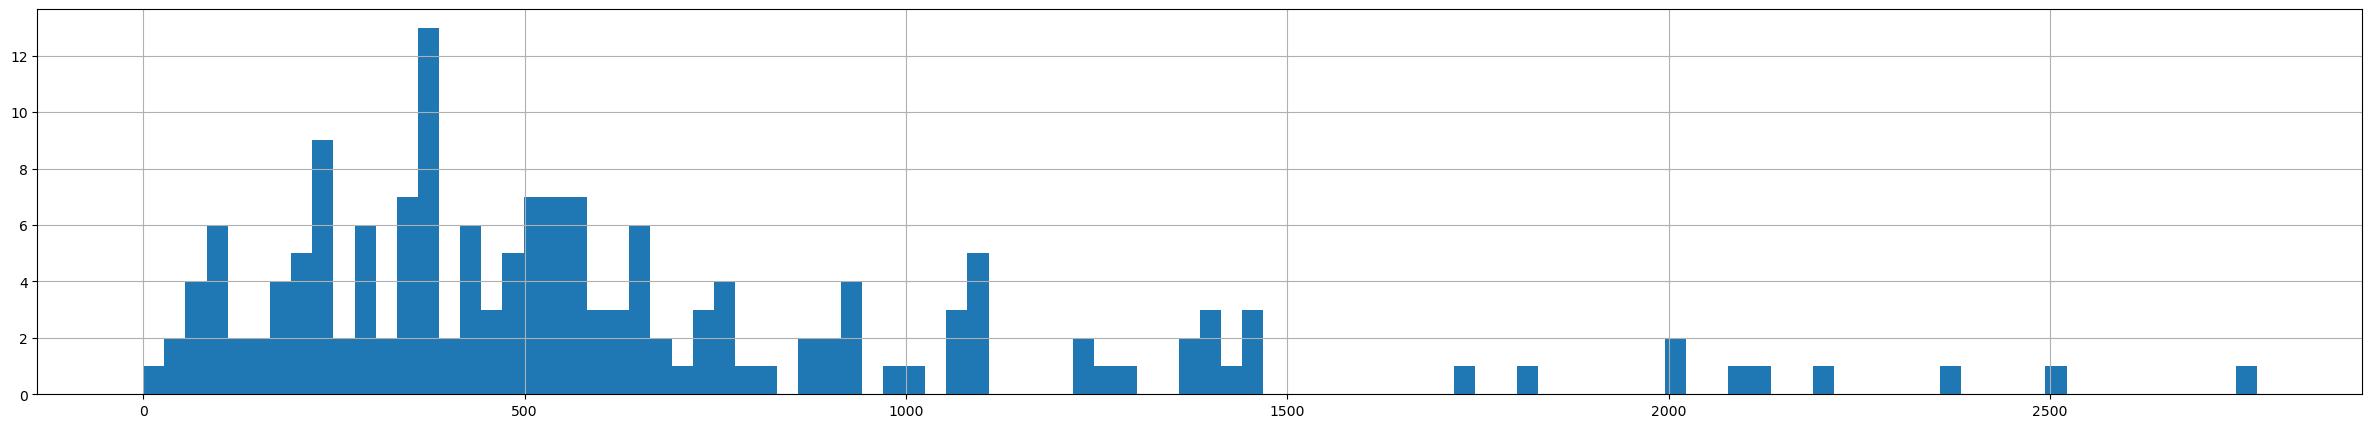

1


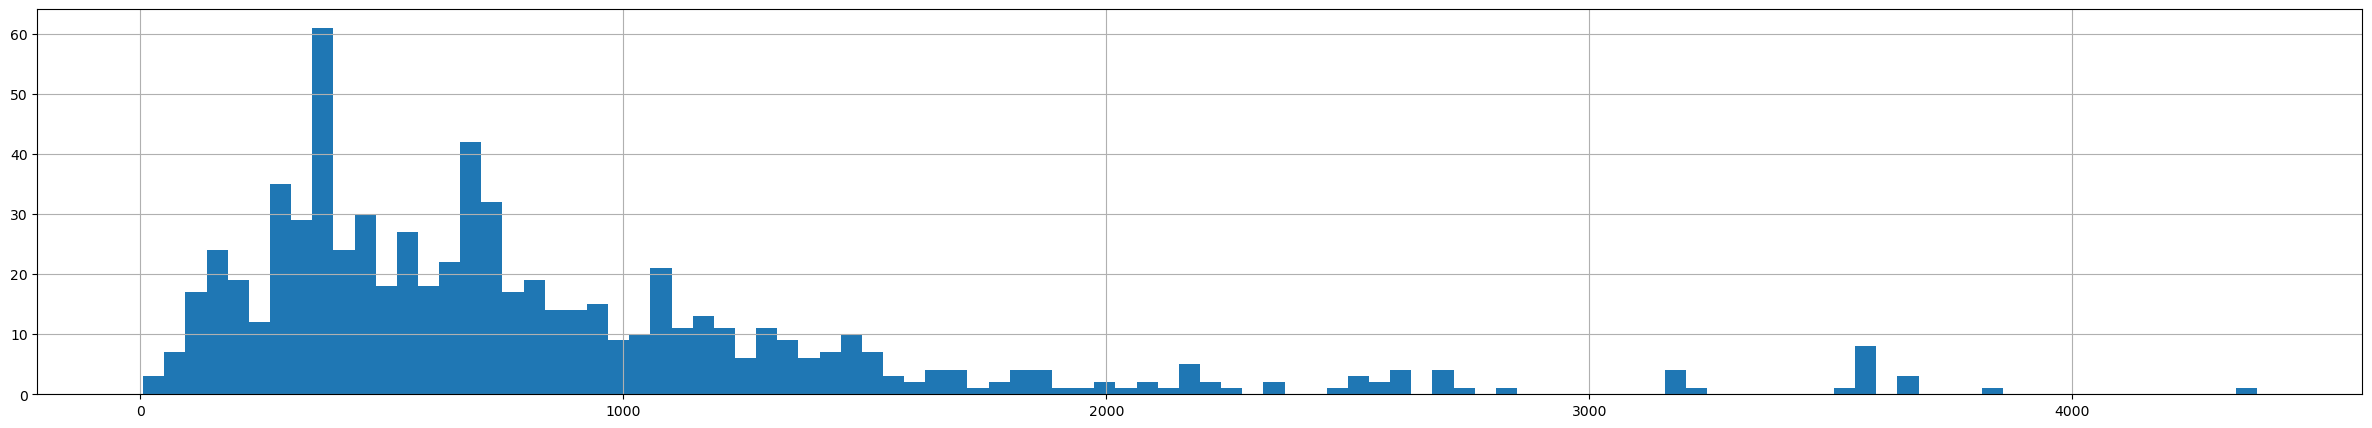

In [224]:
for status, statusdf in df5.groupby("status"):
    print(status)
    statusdf["Project Duration"].hist(bins=100, figsize=(30, 5))
    plt.show()

In [112]:
#df5["Project Size sqrt"] = df5["Project Size"].apply(np.sqrt)
#df5["Project Duration sqrt"] = df5["Project Duration"].apply(np.sqrt)
#col=['Project Size','Project Duration']
#df5 = df5.drop(col,axis =1 )

### Data Imputation 

In [133]:
weights = {'Portfolio Folder L2': 0.5 ,'Portfolio Folder L1': 1 , 'Type': 1, 'nature': 0.5,
           'Framework': 0.5, 'status': 0.5, 'Program Holder': 0.5, 'Program ID': 0.5,
           'Horizon': 1, 'Business Case Id': 0.5 ,'Project Size' :1 }


def weighted_distance(row1, row2, weights):
    dist = 0
    weight_sum = sum(weights.values())
    
    for col, weight in weights.items():
        if row1[col] == row2[col]:
            dist += weight
    
    normalized_dist = dist / weight_sum
    return normalized_dist

def impute_missing_values(row, col, df):
    #Si la valeur de la cellule row[col] est manquante, nous procédons au traitement.
    if pd.isnull(row[col]):
        #num est une variable utilisée pour stocker la somme pondérée des valeurs non manquantes.
        #den est une variable utilisée pour stocker la somme des proximités pondérées.
        num = 0
        den = 0

        # Calcul de la somme pondérée des valeurs non manquantes
        #Nous parcourons les autres lignes (other_row) du DataFrame df3 et calculons la proximité entre la ligne row et chaque autre ligne à l'aide de la fonction weighted_distance,
        # en utilisant la formule de proximité : proximity = 1 / (weighted_distance(row, other_row, weights) + 0.01).
        for _, other_row in df.iterrows():
            #Si la valeur de la cellule other_row[col] n'est pas manquante :
            if not pd.isnull(other_row[col]):
                proximity = 1 / (weighted_distance(row, other_row, weights) + 0.01)
                #nous mettons à jour num en ajoutant le produit de la proximité et de la valeur de la cellule 'other_row[col]'
                # nous mettons à jour den en ajoutant simplement la proximité.
                value = other_row[col]
                num += proximity * value
                den += proximity
        #Si den n'est pas égal à zéro, cela signifie qu'il y a des valeurs non manquantes pour la colonne col et nous pouvons effectuer l'imputation.
        if den != 0:
            #Nous calculons la valeur interpolée en divisant num par den.
            interpolated_value = num / den
            #Nous remplaçons la valeur manquante dans la colonne col de la ligne row du DataFrame df3 par interpolated_value.
            df.at[row.name, col] = interpolated_value
            return interpolated_value
    #Si la valeur de la cellule row[col] n'est pas manquante à l'origine, nous la renvoyons telle quelle sans la modifier.
    return row[col]

# Imputation pour les colonnes numériques
for col in ['Project Duration']:
    df5[col] = df5.apply(impute_missing_values, args=(col, df5), axis=1)



In [134]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938 entries, 1 to 199
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   938 non-null    object 
 1   Portfolio Folder L2  938 non-null    object 
 2   Portfolio Folder L1  938 non-null    int64  
 3   Type                 938 non-null    object 
 4   nature               938 non-null    int64  
 5   Framework            938 non-null    float64
 6   status               938 non-null    int64  
 7   Program Holder       938 non-null    int64  
 8   Program ID           938 non-null    int64  
 9   Horizon              938 non-null    float64
 10  Business Case Id     938 non-null    int64  
 11  Project Size         938 non-null    float64
 12  Project Duration     938 non-null    float64
dtypes: float64(4), int64(6), object(3)
memory usage: 134.9+ KB


In [135]:
import collections
from collections import Counter

counter = Counter(df5['status'])
for k,v in counter.items():
	per = v / len(df5['status']) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=658, Percentage=70.149%
Class=0, Count=280, Percentage=29.851%


In [65]:
df5.to_csv('DF5_DF2.csv', index=False)

### Add Cost Variation Data 

In [136]:
# Load  the CSV file containing information about cost variations
df_cost_variation_common = pd.read_csv(r'C:\Users\SESA705295\Desktop\python\df_cost_variation_common.csv')

In [137]:
  # Merge df5 with DF_variation using the ID column as the merge key
df_commun = df5.merge(df_cost_variation_common, on='ID', how='left')

# Affichage du jeu de données df5 avec les colonnes de variation ajoutées
df_commun.head()

,ID,Portfolio Folder L2,Portfolio Folder L1,Type,nature,Framework,status,Program Holder,Program ID,Horizon,...,External Labor_slope_min,External Labor_slope_std,Internal Labor_amount_mean,Internal Labor_amount_max,Internal Labor_amount_min,Internal Labor_amount_std,Internal Labor_slope_mean,Internal Labor_slope_max,Internal Labor_slope_min,Internal Labor_slope_std
0,[HEIDI 02,Home & Distribution,0,NEW,0,0.0,1,0,0,0.0,...,-2616.774194,1225.185204,54706.730000,204786.08,1510.79,40558.212079,-3883.539524,68881.514516,-108668.657143,27170.998159
1,1101386,IC&D,1,NEW,0,0.0,1,0,0,0.0,...,-23130.774194,9596.243572,23499.513125,107045.12,268.85,27305.052923,-2099.876785,71391.482143,-62902.103226,26102.848720
2,12KLO61E,Digital Energy,0,NEW,0,0.0,1,0,1,0.5,...,-3178.683871,1170.152231,68113.729318,203141.38,-66314.21,59701.536737,-352.345609,107815.054839,-244642.850000,52219.527692
3,1604115,Digital Factory,1,NEW,0,0.0,0,1,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1604120,Digital Factory,1,NEW,0,0.0,1,0,0,0.0,...,-14146.229032,5639.649723,57560.655135,218649.24,197.08,46466.481625,61.054181,119208.350000,-154132.954839,41330.946598


In [138]:
df_commun.shape

(938, 37)

In [140]:
df_commun.columns

Index(['ID', 'Portfolio Folder L2', 'Portfolio Folder L1', 'Type', 'nature',
       'Framework', 'status', 'Program Holder', 'Program ID', 'Horizon',
       'Business Case Id', 'Project Size', 'Project Duration',
       'Expenses_amount_mean', 'Expenses_amount_max', 'Expenses_amount_min',
       'Expenses_amount_std', 'Expenses_slope_mean', 'Expenses_slope_max',
       'Expenses_slope_min', 'Expenses_slope_std',
       'External Labor_amount_mean', 'External Labor_amount_max',
       'External Labor_amount_min', 'External Labor_amount_std',
       'External Labor_slope_mean', 'External Labor_slope_max',
       'External Labor_slope_min', 'External Labor_slope_std',
       'Internal Labor_amount_mean', 'Internal Labor_amount_max',
       'Internal Labor_amount_min', 'Internal Labor_amount_std',
       'Internal Labor_slope_mean', 'Internal Labor_slope_max',
       'Internal Labor_slope_min', 'Internal Labor_slope_std'],
      dtype='object')

#### A quick check for missing values in the dataset

In [141]:
# Select the columns that start with "Expenses", "Internal" and "External"
columns_to_check = [col for col in df_commun.columns if col.startswith(("Expenses", "Internal", "External"))]

# Count the number of projects with missing values ​​in all specified columns
count_missing_all = df_commun[columns_to_check].isnull().all(axis=1).sum()

print("Number of projects with missing values ​​in all specified columns:", count_missing_all)

Nombre de projets ayant des valeurs manquantes dans toutes les colonnes spécifiées: 268


In [142]:
# filter projects with status 0 among projects with missing values ​​in all specified columns
count_status_zero = df_commun[df_commun['status'] == 0][columns_to_check].isnull().all(axis=1).sum()

print("Number of projects with missing values ​​in all columns and status equal to 0:", count_status_zero)

Nombre de projets ayant des valeurs manquantes dans toutes les colonnes et un statut égal à 0: 216


In [53]:
# SSelect the columns that start with "Expenses", "Internal" and "External"
columns_to_check = [col for col in df_commun.columns if col.startswith(("Expenses", "Internal", "External"))]
# Filter projects with status 0 among projects with missing values ​​in all specified columns:
projects_status_zero = df_commun.loc[(df_commun['status'] == 0) & df_commun[columns_to_check].isnull().all(axis=1)]

# Show selected projects
print("Projects with missing values ​​in all columns and status equal to 0:")
print(projects_status_zero)

# save the selected projects in another DataFrame (df_status_zero)
df_status_zero = projects_status_zero.copy()

Projets ayant des valeurs manquantes dans toutes les colonnes et un statut égal à 0:
             ID Portfolio Folder L2  Portfolio Folder L1  Type  nature  \
3       1604115     Digital Factory                    1   NEW       0   
6       1656715     Digital Factory                    1   NEW       0   
24      1825962     Digital Factory                    1  PRED       0   
25      1825977     Digital Factory                    1  PRED       0   
29      1939556     Digital Factory                    1  ADAP       0   
..          ...                 ...                  ...   ...     ...   
933  PRJ_001900            Services                    0  ADAP       0   
934  PRJ_001905        Secure Power                    0   NEW       0   
935  PRJ_001908       Power Systems                    0  ORGA       0   
936  PRJ_002211        Secure Power                    0  PRED       0   
937  TRSS202001                  PA                    1   NEW       0   

     Framework  status  Pr

In [54]:
df_status_zero.head()

,ID,Portfolio Folder L2,Portfolio Folder L1,Type,nature,Framework,status,Program Holder,Program ID,Horizon,...,External Labor_slope_min,External Labor_slope_std,Internal Labor_amount_mean,Internal Labor_amount_max,Internal Labor_amount_min,Internal Labor_amount_std,Internal Labor_slope_mean,Internal Labor_slope_max,Internal Labor_slope_min,Internal Labor_slope_std
3,1604115,Digital Factory,1,NEW,0,0.0,0,1,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1656715,Digital Factory,1,NEW,0,0.5,0,0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,1825962,Digital Factory,1,PRED,0,0.5,0,0,1,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,1825977,Digital Factory,1,PRED,0,0.5,0,0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1939556,Digital Factory,1,ADAP,0,0.5,0,0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_status_zero.to_csv('df_status_zero.csv', index=False)

In [143]:
df_cost_variation_Cancelled = pd.read_csv(r'C:\Users\SESA705295\Desktop\python\df_cost_variation_Cancelled.csv')
df_cost_variation_Cancelled.shape

(60, 13)

In [144]:
df_commun.update(df_cost_variation_Cancelled)
df_commun.shape

(938, 37)

In [145]:
df_commun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938 entries, 0 to 937
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          938 non-null    object 
 1   Portfolio Folder L2         938 non-null    object 
 2   Portfolio Folder L1         938 non-null    int64  
 3   Type                        938 non-null    object 
 4   nature                      938 non-null    int64  
 5   Framework                   938 non-null    float64
 6   status                      938 non-null    int64  
 7   Program Holder              938 non-null    int64  
 8   Program ID                  938 non-null    int64  
 9   Horizon                     938 non-null    float64
 10  Business Case Id            938 non-null    int64  
 11  Project Size                938 non-null    float64
 12  Project Duration            938 non-null    float64
 13  Expenses_amount_mean        540 non

In [147]:
df_commun= df_commun.fillna(0)

In [148]:
import collections
from collections import Counter

counter = Counter(df_commun['status'])
for k,v in counter.items():
	per = v / len(df_commun['status']) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=658, Percentage=70.149%
Class=0, Count=280, Percentage=29.851%


In [150]:
df_commun.columns

Index(['ID', 'Portfolio Folder L2', 'Portfolio Folder L1', 'Type', 'nature',
       'Framework', 'status', 'Program Holder', 'Program ID', 'Horizon',
       'Business Case Id', 'Project Size', 'Project Duration',
       'Expenses_amount_mean', 'Expenses_amount_max', 'Expenses_amount_min',
       'Expenses_amount_std', 'Expenses_slope_mean', 'Expenses_slope_max',
       'Expenses_slope_min', 'Expenses_slope_std',
       'External Labor_amount_mean', 'External Labor_amount_max',
       'External Labor_amount_min', 'External Labor_amount_std',
       'External Labor_slope_mean', 'External Labor_slope_max',
       'External Labor_slope_min', 'External Labor_slope_std',
       'Internal Labor_amount_mean', 'Internal Labor_amount_max',
       'Internal Labor_amount_min', 'Internal Labor_amount_std',
       'Internal Labor_slope_mean', 'Internal Labor_slope_max',
       'Internal Labor_slope_min', 'Internal Labor_slope_std'],
      dtype='object')

In [62]:
df_avecID = df_commun.copy()

In [62]:
pd.set_option('display.max_columns', None)
df_status_0 = df_commun.loc[df_commun['status'] == 0]

In [151]:
col = ['ID', 'Portfolio Folder L2']
df_commun = df_commun.drop(col , axis = 1)

In [152]:
df_commun.Type.unique()

array(['NEW', 'ADVA', 'ADAP', 'PROD', 'PRED', 'INCU', 'XPLO', 'QUAL',
       'OBSC', 'ORGA', 'SUPP', 'WITH', 'Multi Value', 'Epic', 'Offer'],
      dtype=object)

In [153]:
dummies_1 = pd.get_dummies(df_commun['Type'])
df_commun = pd.concat([df_commun,dummies_1],axis=1)
df_commun = df_commun.drop('Type',axis=1)

In [154]:
df_commun.shape

(938, 49)

In [192]:
df_commun.columns

Index(['Portfolio Folder L1', 'nature', 'Framework', 'status',
       'Program Holder', 'Program ID', 'Horizon', 'Business Case Id',
       'Project Size', 'Project Duration', 'Expenses_amount_mean',
       'Expenses_amount_max', 'Expenses_amount_min', 'Expenses_amount_std',
       'Expenses_slope_mean', 'Expenses_slope_max', 'Expenses_slope_min',
       'Expenses_slope_std', 'External Labor_amount_mean',
       'External Labor_amount_max', 'External Labor_amount_min',
       'External Labor_amount_std', 'External Labor_slope_mean',
       'External Labor_slope_max', 'External Labor_slope_min',
       'External Labor_slope_std', 'Internal Labor_amount_mean',
       'Internal Labor_amount_max', 'Internal Labor_amount_min',
       'Internal Labor_amount_std', 'Internal Labor_slope_mean',
       'Internal Labor_slope_max', 'Internal Labor_slope_min',
       'Internal Labor_slope_std', 'ADAP', 'ADVA', 'Epic', 'INCU',
       'Multi Value', 'NEW', 'OBSC', 'ORGA', 'Offer', 'PRED', 'PROD', 'QU

In [155]:
df_commun.dtypes

Portfolio Folder L1             int64
nature                          int64
Framework                     float64
status                          int64
Program Holder                  int64
Program ID                      int64
Horizon                       float64
Business Case Id                int64
Project Size                  float64
Project Duration              float64
Expenses_amount_mean          float64
Expenses_amount_max           float64
Expenses_amount_min           float64
Expenses_amount_std           float64
Expenses_slope_mean           float64
Expenses_slope_max            float64
Expenses_slope_min            float64
Expenses_slope_std            float64
External Labor_amount_mean    float64
External Labor_amount_max     float64
External Labor_amount_min     float64
External Labor_amount_std     float64
External Labor_slope_mean     float64
External Labor_slope_max      float64
External Labor_slope_min      float64
External Labor_slope_std      float64
Internal Lab

<AxesSubplot:>

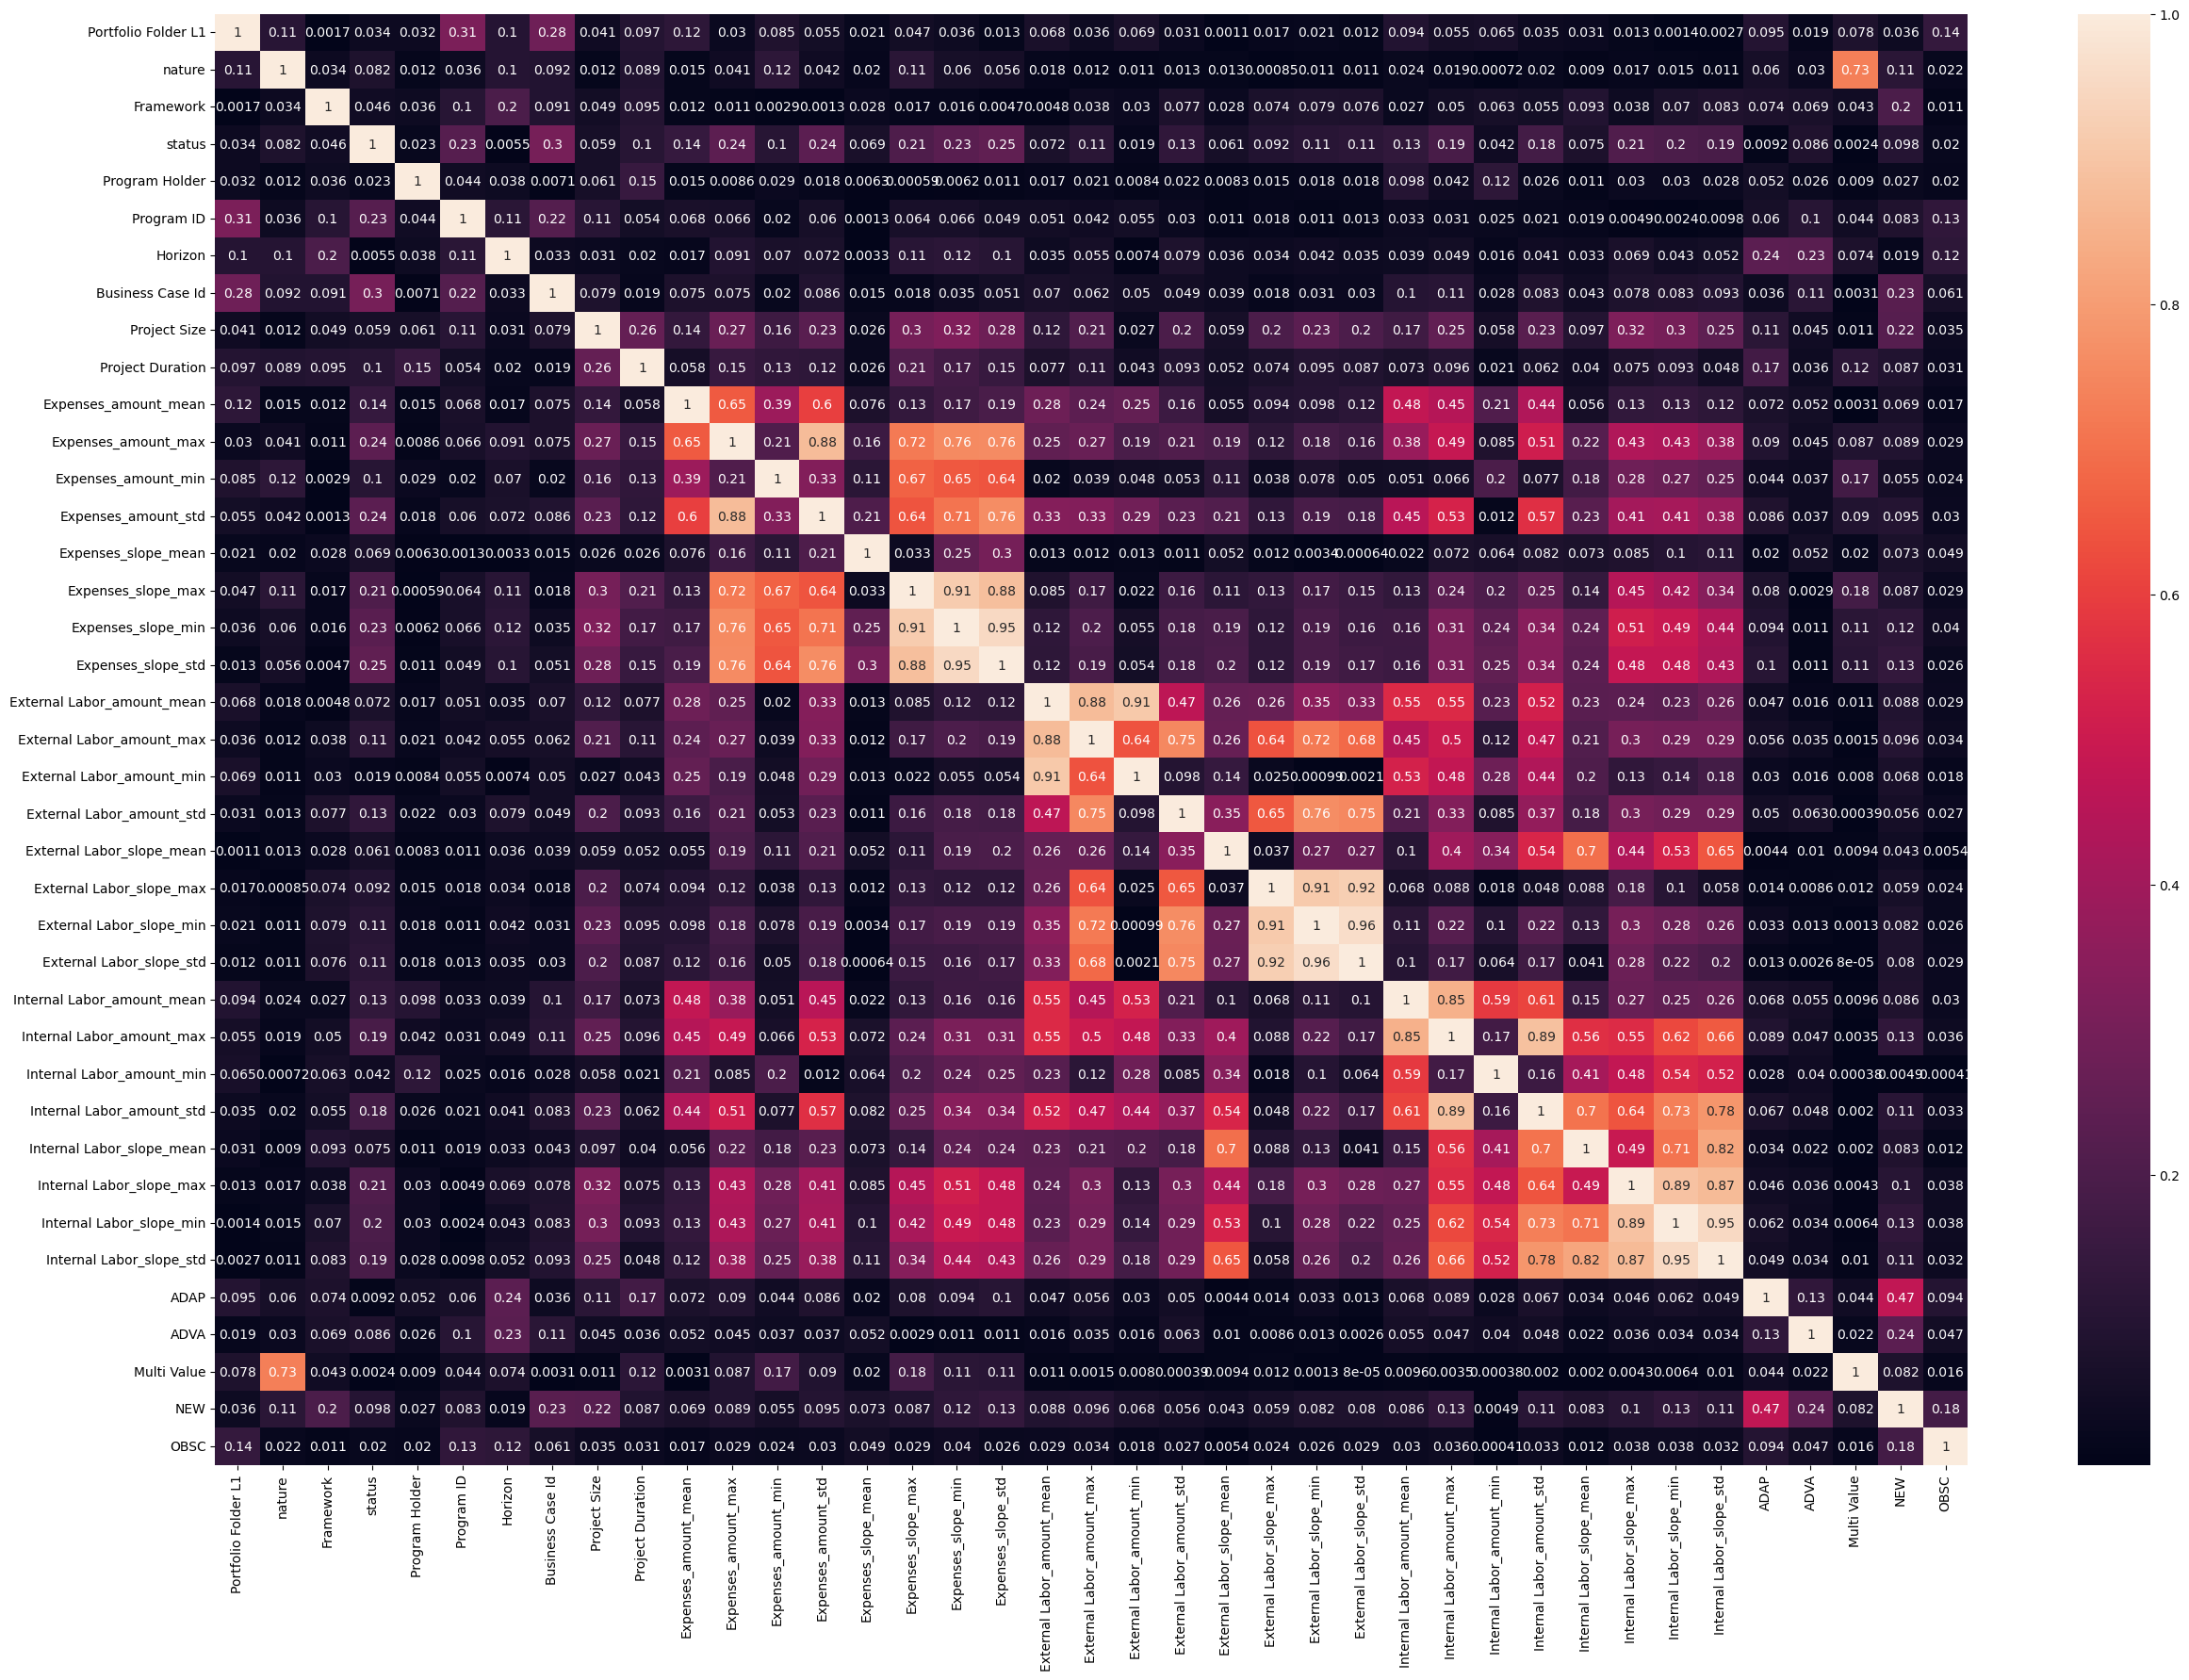

In [195]:
#Graphe rprésentant la corrélation entre les featutres deux à deux
import matplotlib.pyplot as plt
import seaborn as sns
#data_f=df2.loc[1:,'status':'OPTIMIZE']
corrdata=df_commun[['Portfolio Folder L1', 'nature', 'Framework', 'status',
       'Program Holder', 'Program ID', 'Horizon', 'Business Case Id',
       'Project Size', 'Project Duration', 'Expenses_amount_mean',
       'Expenses_amount_max', 'Expenses_amount_min', 'Expenses_amount_std',
       'Expenses_slope_mean', 'Expenses_slope_max', 'Expenses_slope_min',
       'Expenses_slope_std', 'External Labor_amount_mean',
       'External Labor_amount_max', 'External Labor_amount_min',
       'External Labor_amount_std', 'External Labor_slope_mean',
       'External Labor_slope_max', 'External Labor_slope_min',
       'External Labor_slope_std', 'Internal Labor_amount_mean',
       'Internal Labor_amount_max', 'Internal Labor_amount_min',
       'Internal Labor_amount_std', 'Internal Labor_slope_mean',
       'Internal Labor_slope_max', 'Internal Labor_slope_min',
       'Internal Labor_slope_std', 'ADAP', 'ADVA', 
       'Multi Value', 'NEW', 'OBSC']]
corr=corrdata.corr()
plt.figure(figsize=(30,20))
#sns.set_context("poster")
sns.heatmap(corr.abs(),annot=True, annot_kws={"size":10})

#### Preprocessing

In [71]:

# Filtrer le dataframe pour les projets ayant Project Size = 142 et Project Duration = 1420
filtered_projects = df_avecID.loc[(df_avecID['Project Size'] == 130265.0) & (df_avecID['Project Duration'] == 1491)]

# Afficher les informations sur les projets filtrés
filtered_projects

,ID,Portfolio Folder L2,Portfolio Folder L1,Type,nature,Framework,status,Program Holder,Program ID,Horizon,...,External Labor_slope_min,External Labor_slope_std,Internal Labor_amount_mean,Internal Labor_amount_max,Internal Labor_amount_min,Internal Labor_amount_std,Internal Labor_slope_mean,Internal Labor_slope_max,Internal Labor_slope_min,Internal Labor_slope_std
583,PAIndus201915,Industrialization,1,QUAL,0,0.5,1,0,1,0.0,...,0.0,0.0,5410.006667,18907.61,142.04,5516.725405,-507.182351,4965.142623,-10756.983871,3416.044269


In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_commun), columns=df_commun.columns)

# Afficher le DataFrame normalisé
df_normalized

,Portfolio Folder L1,nature,Framework,status,Program Holder,Program ID,Horizon,Business Case Id,Project Size,Project Duration,Expenses_amount_mean,Expenses_amount_max,Expenses_amount_min,Expenses_amount_std,Expenses_slope_mean,Expenses_slope_max,Expenses_slope_min,Expenses_slope_std,External Labor_amount_mean,External Labor_amount_max,External Labor_amount_min,External Labor_amount_std,External Labor_slope_mean,External Labor_slope_max,External Labor_slope_min,External Labor_slope_std,Internal Labor_amount_mean,Internal Labor_amount_max,Internal Labor_amount_min,Internal Labor_amount_std,Internal Labor_slope_mean,Internal Labor_slope_max,Internal Labor_slope_min,Internal Labor_slope_std,ADAP,ADVA,Epic,INCU,Multi Value,NEW,OBSC,ORGA,Offer,PRED,PROD,QUAL,SUPP,WITH,XPLO
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.232038,0.326107,0.245224,0.213553,0.519023,0.054569,0.260910,0.119918,0.536777,0.128140,0.004658,0.011287,0.181049,0.014156,0.913297,0.114449,0.982392,0.006934,0.008664,4.443599e-12,0.513133,0.035870,0.978328,0.376548,0.938977,0.027527,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.078798,0.207440,1.000000,1.000000,0.887141,1.000000,0.261128,0.052330,0.604400,0.136070,0.949845,0.705515,0.958923,0.076085,0.890174,0.131533,0.933799,0.054313,1.000000,9.325653e-01,0.965933,0.718986,0.981556,0.378089,0.964039,0.026445,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.170629,0.260840,0.237008,0.173321,0.617919,0.000414,0.261154,0.005876,0.666672,0.003316,0.010931,0.014540,0.182503,0.018447,0.912132,0.112323,0.981061,0.006623,0.027182,2.495040e-02,0.513506,0.034625,0.984718,0.400448,0.864517,0.052904,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.050093,0.455956,0.386735,0.282633,0.720121,0.000000,0.261169,0.005160,0.667718,0.000000,0.005633,0.004184,0.185607,0.000000,0.916045,0.108785,0.988591,0.000000,0.672473,4.534101e-01,1.000000,0.000000,0.985356,0.334265,0.998485,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.158645,0.226609,0.238935,0.174618,0.619337,0.101412,0.261020,0.158675,0.533640,0.206526,0.028784,0.048104,0.192501,0.044908,0.924155,0.132622,0.955081,0.031920,0.029119,2.514184e-02,0.516141,0.031441,0.985466,0.407442,0.914081,0.041873,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.050093,0.191513,0.236877,0.173114,0.617933,0.000000,0.261169,0.005160,0.667718,0.000000,0.000000,0.000000,0.180993,0.000000,0.916045,0.108785,0.988591,0.000000,0.008664,0.000000e+00,0.513133,0.000000,0.985356,0.334265,0.998485,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.050093,0.170927,0.236877,0.173114,0.617933,0.000000,0.261169,0.005160,0.667718,0.000000,0.000000,0.000000,0.180993,0.000000,0.916045,0.108785,0.988591,0.000000,0.008664,0.000000e+00,0.513133,0.000000,0.985356,0.334265,0.998485,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
985,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.050093,0.188099,0.236877,0.173114,0.617933,0.000000,0.261169,0.005160,0.667718,0.000000,0.000000,0.000000,0.180993,0.000000,0.916045,0.108785,0.988591,0.000000,0.008664,0.000000e+00,0.513133,0.000000,0.985356,0.334265,0.998485,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
986,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.050093,0.191068,0.236877,0.173114,0.617933,0.000000,0.261169,0.005160,0.667718,0.000000,0.000000,0.000000,0.180993,0.000000,0.916045,0.108785,0.988591,0.000000,0.008664,0.000000e+00,0.513133,0.000000,0.985356,0.334265,0.998485,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [158]:
#Define X, y 
#define x, y and x_test
y = df_commun.status
X = df_commun.drop('status', axis = 1)
X.shape, y.shape

((938, 48), (938,))

In [159]:
df_commun.loc[df_commun['status'] == 0]

,Portfolio Folder L1,nature,Framework,status,Program Holder,Program ID,Horizon,Business Case Id,Project Size,Project Duration,...,NEW,OBSC,ORGA,Offer,PRED,PROD,QUAL,SUPP,WITH,XPLO
3,1,0,0.0,0,1,0,0.0,0,9.456284e+05,1998.000000,...,1,0,0,0,0,0,0,0,0,0
6,1,0,0.5,0,0,0,0.0,0,1.022032e+06,639.000000,...,1,0,0,0,0,0,0,0,0,0
9,1,0,0.5,0,0,0,0.0,0,2.695000e+03,542.000000,...,1,0,0,0,0,0,0,0,0,0
22,1,0,0.0,0,0,0,0.5,0,2.140700e+04,917.000000,...,1,0,0,0,0,0,0,0,0,0
24,1,0,0.5,0,0,0,0.5,0,1.102161e+06,223.000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,0,0,0.5,0,0,1,0.5,1,1.117460e+06,824.313829,...,0,0,0,0,0,0,0,0,0,0
934,0,0,0.5,0,0,1,0.0,1,1.028997e+06,799.665939,...,1,0,0,0,0,0,0,0,0,0
935,0,0,0.5,0,0,1,0.5,1,1.077563e+06,803.057920,...,0,0,1,0,0,0,0,0,0,0
936,0,0,0.5,0,0,1,0.0,1,1.138855e+06,823.303119,...,0,0,0,0,1,0,0,0,0,0


In [160]:
import collections
from collections import Counter

counter = Counter(df_commun.status)
for k,v in counter.items():
	per = v / len(df_commun.status) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=658, Percentage=70.149%
Class=0, Count=280, Percentage=29.851%


In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(X, y, random_state=1, test_size=0.20, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 48), (188, 48), (750,), (188,))

In [162]:
y_test.value_counts()

1    132
0     56
Name: status, dtype: int64

#### Modeling

In [163]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [215]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
# Running the random forest with default parameters.
rfc = RandomForestClassifier()
# Instancier la classe SMOTE
smote = SMOTE(random_state=0,sampling_strategy=0.75)

# Appliquer la méthode fit_resample pour équilibrer les données d'entraînement
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Entraîner le modèle sur les données équilibrées
rfc.fit(X_resampled, y_resampled)

# Faire des prédictions sur les données de test
y_pred = rfc.predict(X_test)

In [216]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.85        56
           1       0.91      0.98      0.95       132

    accuracy                           0.92       188
   macro avg       0.93      0.88      0.90       188
weighted avg       0.92      0.92      0.92       188



In [217]:
from sklearn.metrics import precision_score, f1_score, confusion_matrix
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test  , y_pred)
print('precision: ', precision)
print('f1_score: ',f1)
confusion_matrix(y_test  , y_pred)

precision:  0.9148936170212766
f1_score:  0.945054945054945


array([[ 44,  12],
       [  3, 129]], dtype=int64)

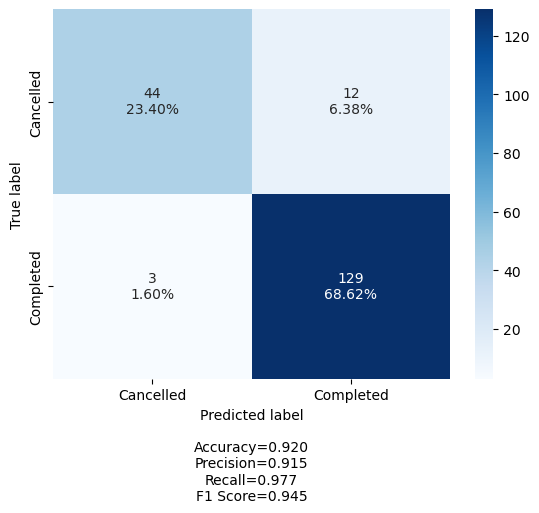

In [218]:
cf_matrix = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cf_matrix, categories=["Cancelled", "Completed"])

In [200]:
print(Counter(y_pred))

Counter({1: 140, 0: 48})


In [169]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Accuracy train: ',rfc.score(X_train,y_train))

Accuracy:  0.9202127659574468
Accuracy train:  1.0


In [170]:
df_x=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df_x

,Actual,Predicted
81,1,1
650,1,0
148,1,1
897,0,0
281,1,1
...,...,...
796,1,1
134,1,1
716,1,1
437,1,1


In [171]:
def plot_feature_importance(importance,names,model_type):

     #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

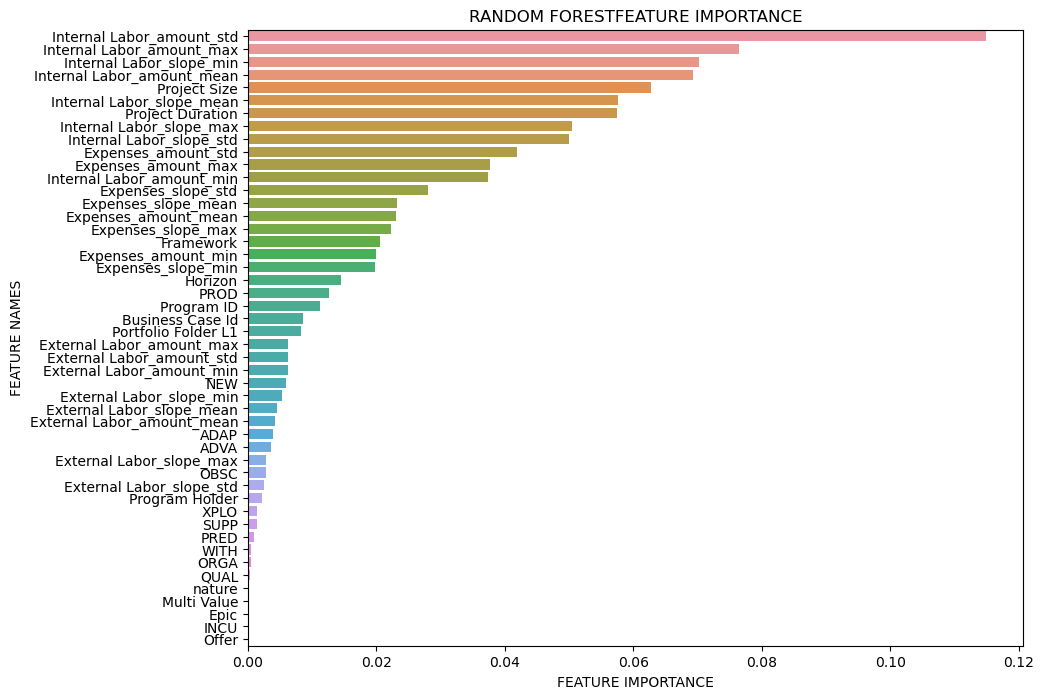

In [172]:
plot_feature_importance(rfc.feature_importances_,X_train.columns,'RANDOM FOREST')

#### XGBOOST_SANS_SMOTE

Accuracy of xgboost: 0.925531914893617


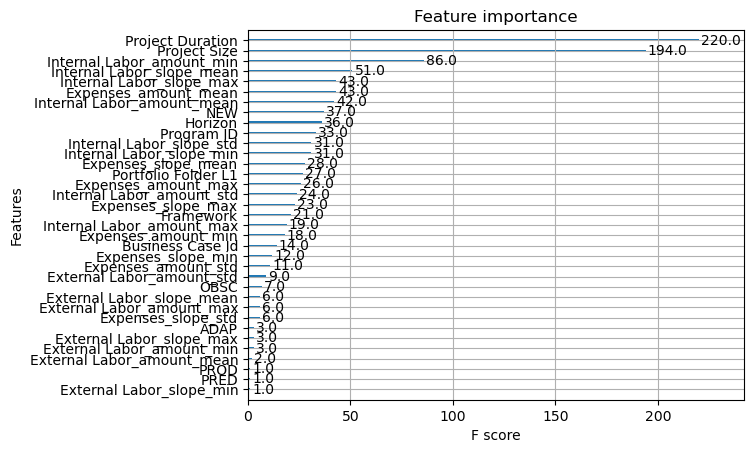

In [219]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
pos_weight = len(y_train[y_train==1]) / len(y_train[y_train==0])


XGBmodel = XGBClassifier(scale_pos_weight =pos_weight)
XGBmodel.fit(X_train, y_train)
xgbprediction = XGBmodel.predict(X_test)
print('Accuracy of xgboost:', accuracy_score(xgbprediction,y_test))
plot_importance(XGBmodel)
plt.show()

In [220]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report
# Let's check the report of our default model
print(classification_report(y_test, xgbprediction))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86        56
           1       0.91      0.99      0.95       132

    accuracy                           0.93       188
   macro avg       0.94      0.88      0.90       188
weighted avg       0.93      0.93      0.92       188



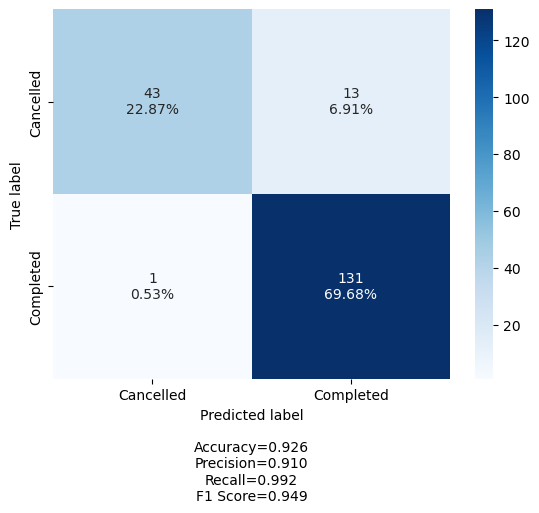

In [221]:
cf_matrix = confusion_matrix(y_test, xgbprediction)
make_confusion_matrix(cf_matrix, categories=["Cancelled", "Completed"])

#### XGBOOST_AVEC_SMOTE

In [228]:
from xgboost import XGBClassifier

XGBmode_SMOTE = XGBClassifier()
# Instancier la classe SMOTE
smote = SMOTE(random_state=0, sampling_strategy=0.74)

# Appliquer la méthode fit_resample pour équilibrer les données d'entraînement
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Entraîner le modèle sur les données équilibrées
XGBmode_SMOTE.fit(X_resampled, y_resampled)

xgbprediction2 = XGBmode_SMOTE.predict(X_test)


In [229]:
from sklearn.metrics import precision_score, f1_score, confusion_matrix
precision = precision_score(y_test, xgbprediction2)
f1 = f1_score(y_test  , xgbprediction2)
print('precision: ', precision)
print('f1_score: ',f1)
confusion_matrix(y_test  , xgbprediction2)

precision:  0.9197080291970803
f1_score:  0.9368029739776952


array([[ 45,  11],
       [  6, 126]], dtype=int64)

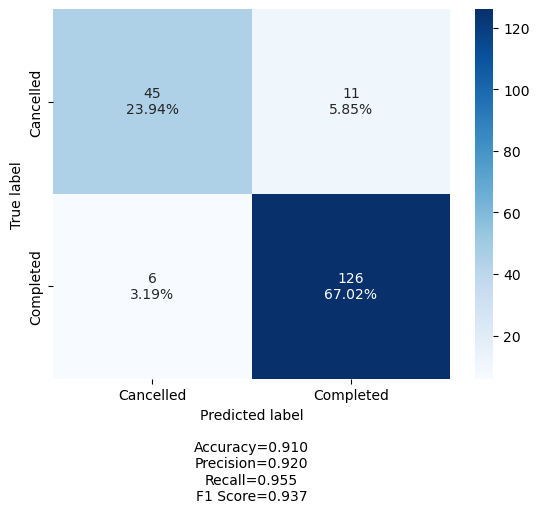

In [230]:
cf_matrix = confusion_matrix(y_test, xgbprediction2)
make_confusion_matrix(cf_matrix, categories=["Cancelled", "Completed"])

In [210]:
from sklearn.ensemble import AdaBoostClassifier
adaboostclassifier = AdaBoostClassifier()
# Instancier la classe SMOTE
smote = SMOTE(random_state=0, sampling_strategy=0.8)

# Appliquer la méthode fit_resample pour équilibrer les données d'entraînement
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Entraîner le modèle sur les données équilibrées
adaboostclassifier.fit(X_resampled, y_resampled)

adaboostprediction = adaboostclassifier.predict(X_test)
print('Accuracy of Ada Boost:', accuracy_score(adaboostprediction,y_test))

Accuracy of Ada Boost: 0.8670212765957447


In [211]:
from sklearn.metrics import precision_score, f1_score, confusion_matrix
precision = precision_score(y_test, adaboostprediction)
f1 = f1_score(y_test  , adaboostprediction)
print('precision: ', precision)
print('f1_score: ',f1)
confusion_matrix(y_test  , adaboostprediction)

precision:  0.9083969465648855
f1_score:  0.9049429657794676


array([[ 44,  12],
       [ 13, 119]], dtype=int64)

In [189]:
import pickle
pickle.dump(XGBmode_SMOTE, open("pima.pickle.dat", "wb"))

In [191]:
loaded_model = pickle.load(open("pima.pickle.dat", "rb"))

In [232]:
probability = XGBmode_SMOTE.predict_proba(X_test)[:,1]
probability

array([9.9891484e-01, 6.9370770e-01, 9.9975437e-01, 6.1386258e-05,
       9.9906522e-01, 9.9562752e-01, 1.7351078e-02, 5.4474145e-01,
       9.9940932e-01, 9.9811304e-01, 9.6963859e-01, 9.9960488e-01,
       9.8773217e-01, 3.0260620e-04, 2.1607896e-04, 9.9915600e-01,
       4.0114287e-04, 3.5342721e-03, 9.9819905e-01, 9.8807949e-01,
       9.9630004e-01, 1.6696851e-05, 9.8151922e-01, 9.1134280e-01,
       9.9898070e-01, 9.9735727e-05, 3.8660404e-05, 9.9666911e-01,
       3.1173477e-05, 9.2455155e-01, 2.9221198e-03, 9.9907243e-01,
       1.3476667e-04, 9.2143381e-01, 9.9909055e-01, 9.9774593e-01,
       8.3540267e-01, 9.9640661e-01, 6.7642215e-04, 9.5929295e-01,
       1.7351078e-02, 9.9685752e-01, 8.9586401e-01, 9.9624419e-01,
       9.9781740e-01, 9.9812168e-01, 9.8920608e-01, 9.6892881e-01,
       9.6616101e-01, 9.9237871e-01, 4.2261198e-01, 9.9979824e-01,
       8.9105505e-01, 9.9509561e-01, 9.7292769e-01, 1.8972236e-01,
       9.8665881e-01, 9.9194431e-01, 1.2356412e-04, 9.8999751e

In [8]:
#data=[[1,38,1,0,1,1]] #hedhi ta3tina 1
#data1=[[1,38,1,1,1,1]] #hedhi ta3tina 0
input_data= []
features=['Portfolio Folder L1', 'nature', 'Framework', 'Program Holder','Program ID', 'Horizon', 'Business Case Id', 'Project Size',
       'Project Duration', 'Expenses_amount_mean', 'Expenses_amount_max', 'Expenses_amount_min', 'Expenses_amount_std', 'Expenses_slope_mean',
       'Expenses_slope_max', 'Expenses_slope_min', 'Expenses_slope_std', 'External Labor_amount_mean', 'External Labor_amount_max',
       'External Labor_amount_min', 'External Labor_amount_std','External Labor_slope_mean', 'External Labor_slope_max',
       'External Labor_slope_min', 'External Labor_slope_std','Internal Labor_amount_mean', 'Internal Labor_amount_max',
       'Internal Labor_amount_min', 'Internal Labor_amount_std','Internal Labor_slope_mean', 'Internal Labor_slope_max',
       'Internal Labor_slope_min', 'Internal Labor_slope_std', 'ADAP', 'ADVA','Epic', 'INCU', 'Multi Value', 'NEW', 'OBSC', 'ORGA', 'Offer', 'PRED',
       'PROD', 'QUAL', 'SUPP', 'WITH', 'XPLO']

for i in features:
  print(f'Donner  {i} :')
  a=input()
  input_data.append(float(a))
print(input_data)

Donner  Portfolio Folder L1 :
Donner  nature :
Donner  Framework :
Donner  Program Holder :
Donner  Program ID :
Donner  Horizon :
Donner  Business Case Id :
Donner  Project Size :
Donner  Project Duration :
Donner  Expenses_amount_mean :
Donner  Expenses_amount_max :
Donner  Expenses_amount_min :
Donner  Expenses_amount_std :
Donner  Expenses_slope_mean :
Donner  Expenses_slope_max :
Donner  Expenses_slope_min :
Donner  Expenses_slope_std :
Donner  External Labor_amount_mean :
Donner  External Labor_amount_max :
Donner  External Labor_amount_min :
Donner  External Labor_amount_std :
Donner  External Labor_slope_mean :
Donner  External Labor_slope_max :
Donner  External Labor_slope_min :
Donner  External Labor_slope_std :
Donner  Internal Labor_amount_mean :
Donner  Internal Labor_amount_max :
Donner  Internal Labor_amount_min :
Donner  Internal Labor_amount_std :
Donner  Internal Labor_slope_mean :
Donner  Internal Labor_slope_max :
Donner  Internal Labor_slope_min :
Donner  Internal 